Box Model from Sarmiento and Gruber "Ocean Biogeochemical Dynamics" page 11

In [2]:
import sys
import os
import copy
import numpy as np
import datetime

from matplotlib import pyplot as plt

BOXSIMU_PATH = '/home/aschi/Documents/MyPrivateRepo/boxsimu_project/'
if not BOXSIMU_PATH in sys.path:
    sys.path.append(BOXSIMU_PATH)

from boxsimu.entities import Fluid, Variable
from boxsimu.box import Box
from boxsimu.transport import  Flow, Flux
from boxsimu.condition import Condition
from boxsimu.system import BoxModelSystem 
from boxsimu.process import Process, Reaction
from boxsimu.solver import Solver
from boxsimu import utils
from boxsimu import ur


def get_system(): 
    #############################
    # FLUIDS
    #############################
    seawater = Fluid('sea water', rho=1020*ur.kg/ur.meter**3)
    
    #############################
    # VARIABLES
    #############################
    po4 = Variable('po4')
    
    #############################
    # PROCESSES
    #############################

    #############################
    # REACTIONS
    #############################
    
    
    #############################
    # BOXES
    #############################
    
    inital_po4_masses = (6e-8*3e19*ur.kg + 6e-8*1e21*ur.kg)/2
    upper_ocean = Box(
        name='upper_ocean',
        name_long='Upper Ocean Box',
        fluid=seawater.q(3e19*ur.kg), 
        processes=[],
        condition=Condition(),
        variables=[po4.q(inital_po4_masses)],
        reactions=[],
    )
    deep_ocean = Box(
        name='deep_ocean',
        name_long='Deep Ocean Box',
        fluid=seawater.q(1e21*ur.kg),
        condition=Condition(),
        variables=[po4.q(inital_po4_masses)],
        reactions=[],
    )
    
    #############################
    # FLOWS
    #############################
    flow_downwelling = Flow(
        name='Downwelling', 
        source_box=upper_ocean, 
        target_box=deep_ocean,
        rate=6e17*ur.kg/ur.year,
        tracer_transport=True,
    )

    flow_upwelling = Flow(
        name='Upwelling',
        source_box=deep_ocean, 
        target_box=upper_ocean,
        rate=6e17*ur.kg/ur.year, 
        tracer_transport=True,
    )
    
    #############################
    # FLUXES
    #############################

    biological_pump = Flux(
        name='Biological Pump',
        source_box=upper_ocean,
        target_box=deep_ocean,
        variable=po4,
        rate=lambda t, c: 5.1e-8 * 6e17*ur.kg/ur.year
    )

    #############################
    # SYSTEM
    #############################

    bmsystem = BoxModelSystem('Box Model from Sarmiento and Gruber "Ocean Biogeochemical Dynamics" page 11', 
        boxes=[upper_ocean, deep_ocean], 
        flows=[
            flow_downwelling, 
            flow_upwelling, 
        ],
        fluxes=[
            biological_pump, 
        ], 
        global_condition=Condition(),
    )
    return bmsystem

system = get_system()

In [3]:
sol = system.solve(500*ur.year, 25*ur.year)

Start solving the box model...
- total integration time: 500 year
- dt (time step): 25 year
> /home/aschi/Documents/MyPrivateRepo/boxsimu_project/boxsimu/solver.py(111)solve()
-> self.system = copy.deepcopy(self._system_initial)
(Pdb) c
0
1
10.0%
2
3
20.0%
4
5
30.0%
6
7
40.0%
8
9
50.0%
10
11
60.0%
12
13
70.0%
14
15
80.0%
16
17
90.0%
18
19
Function "solve(...)" used 0.375s


(<matplotlib.figure.Figure at 0x7fa16e07f518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa13f09b9b0>)

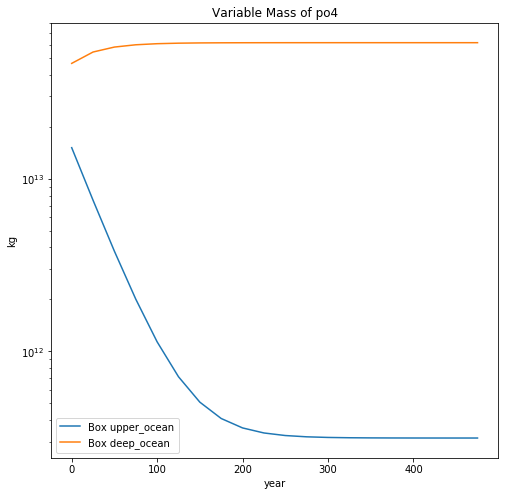

In [4]:
sol.plot_variable_mass_of_all_boxes(system.variables.po4)

(<matplotlib.figure.Figure at 0x7fa13f3241d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa13f3339e8>)

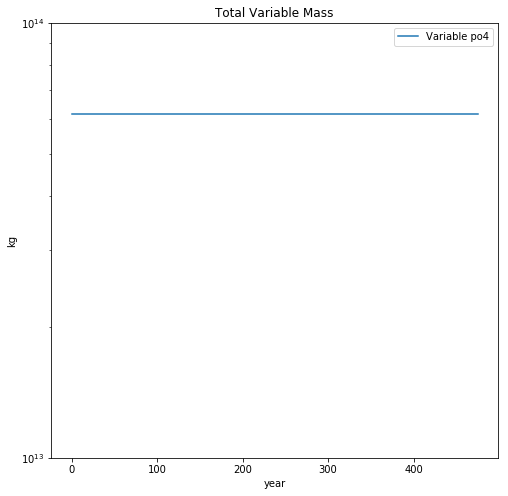

In [5]:
sol.plot_total_variable_masses()

box_mass:  3.00000309e+19 kilogram
1.04859548157e-08
box_mass:  1.0000000309e+21 kilogram
6.14854191316e-08


(<matplotlib.figure.Figure at 0x7fa13ca94f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa13ca41c50>)

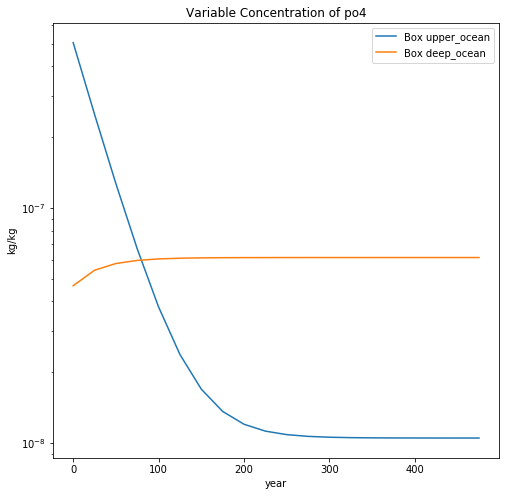

In [6]:
sol.plot_variable_concentration_of_all_boxes(system.variables.po4)

In [11]:
system.boxes.upper_ocean.id

1